In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_0 = pd.read_csv("../data/Training_Set_Values.csv")
df_1 = pd.read_csv("../data/Training_Set_labels.csv")
df = df_0.merge(df_1, on='id')
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.lower() if isinstance(x, str) else x)

In [3]:
df_clean = pd.read_csv("../data_preprocessing/cleaned_df.csv")
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.lower() if isinstance(x, str) else x)
df_clean

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,other,1390.0,other,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,other,1399.0,other,34.698766,-2.147466,zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,other,686.0,other,37.460664,-3.821329,kwa mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,unicef,263.0,other,38.486161,-11.155298,zahanati ya nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,other,1300.0,other,31.130847,-1.825359,shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,germany republi,1210.0,other,37.169807,-3.253847,area three namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,other,1212.0,other,35.249991,-9.070629,kwa yahona kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,other,829.5,other,34.017087,-8.750434,mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,other,389.0,other,35.861315,-6.378573,mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [4]:
df_clean['construction_year'] =df_clean['construction_year'].round(0).astype(int)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'functional': 'green',
    'functional needs repair': 'gold',
    'non functional': 'gray'
}

C:\Users\14ame\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


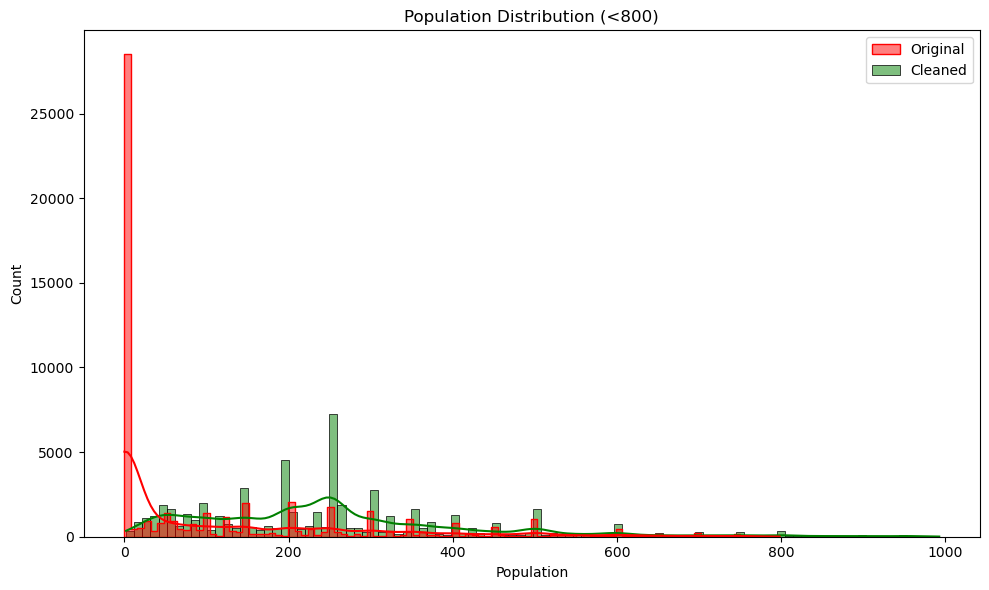

In [59]:
plt.figure(figsize=(10, 6))

sns.histplot(df_clean[df_clean['population'] < 1000]['population'], bins=100, color='green', alpha=0.5, label='Cleaned', kde=True)
sns.histplot(df[df['population'] < 800]['population'], bins=100, color='red', label='Original', element='step', kde=True)

plt.title("Population Distribution (<800)")
plt.xlabel("Population")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


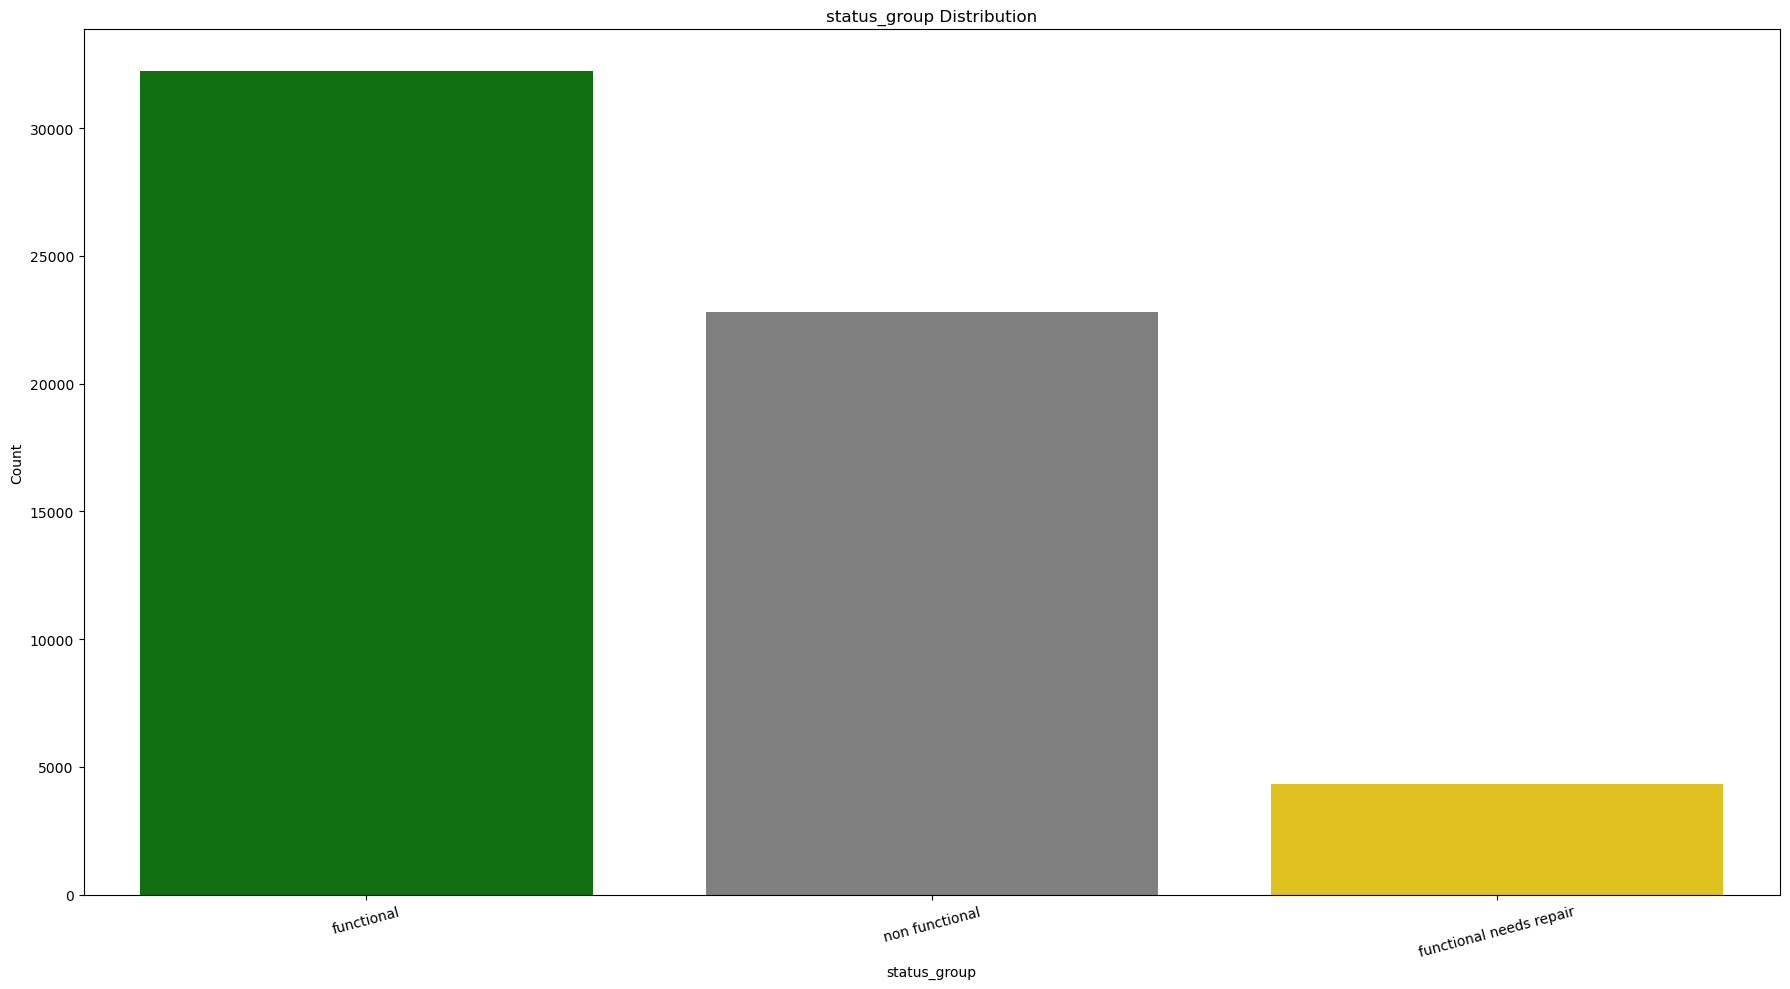

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='status_group', palette=custom_palette)

plt.title("status_group Distribution")
plt.xlabel("status_group")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()

plt.savefig("status_group_distribution.png", dpi=300)  

plt.show()

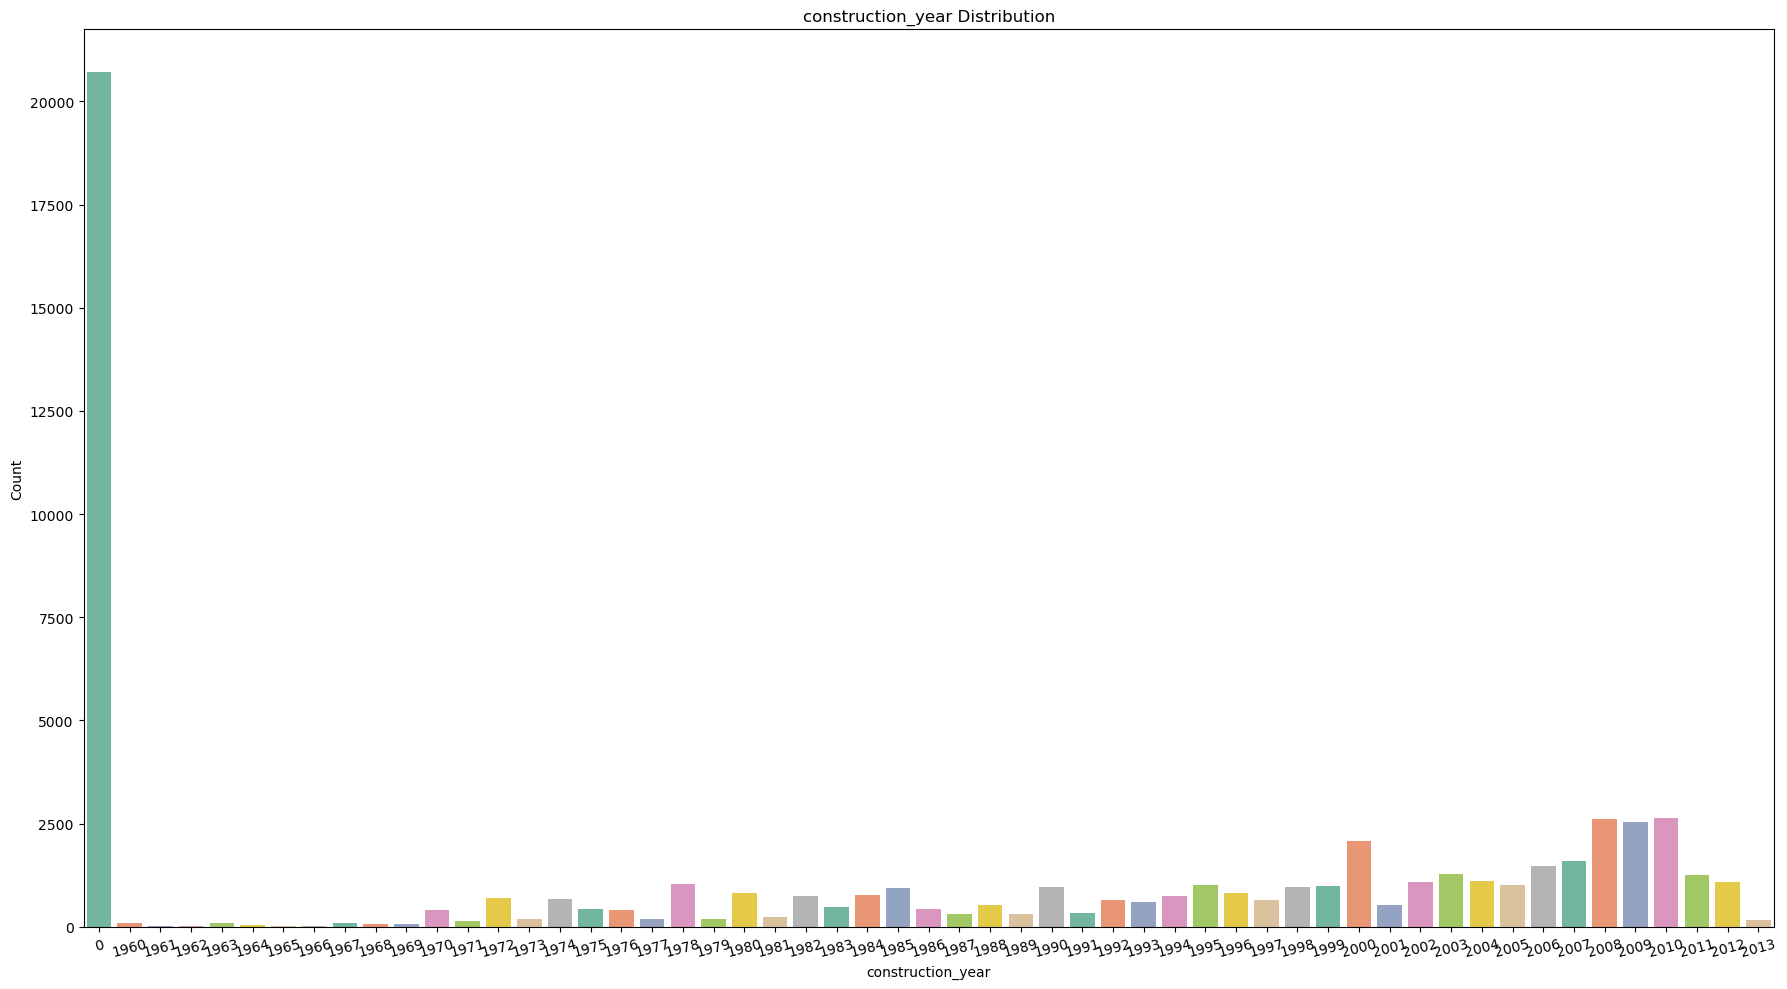

In [18]:
plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='construction_year', palette='Set2')

plt.title("construction_year Distribution")
plt.xlabel("construction_year")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

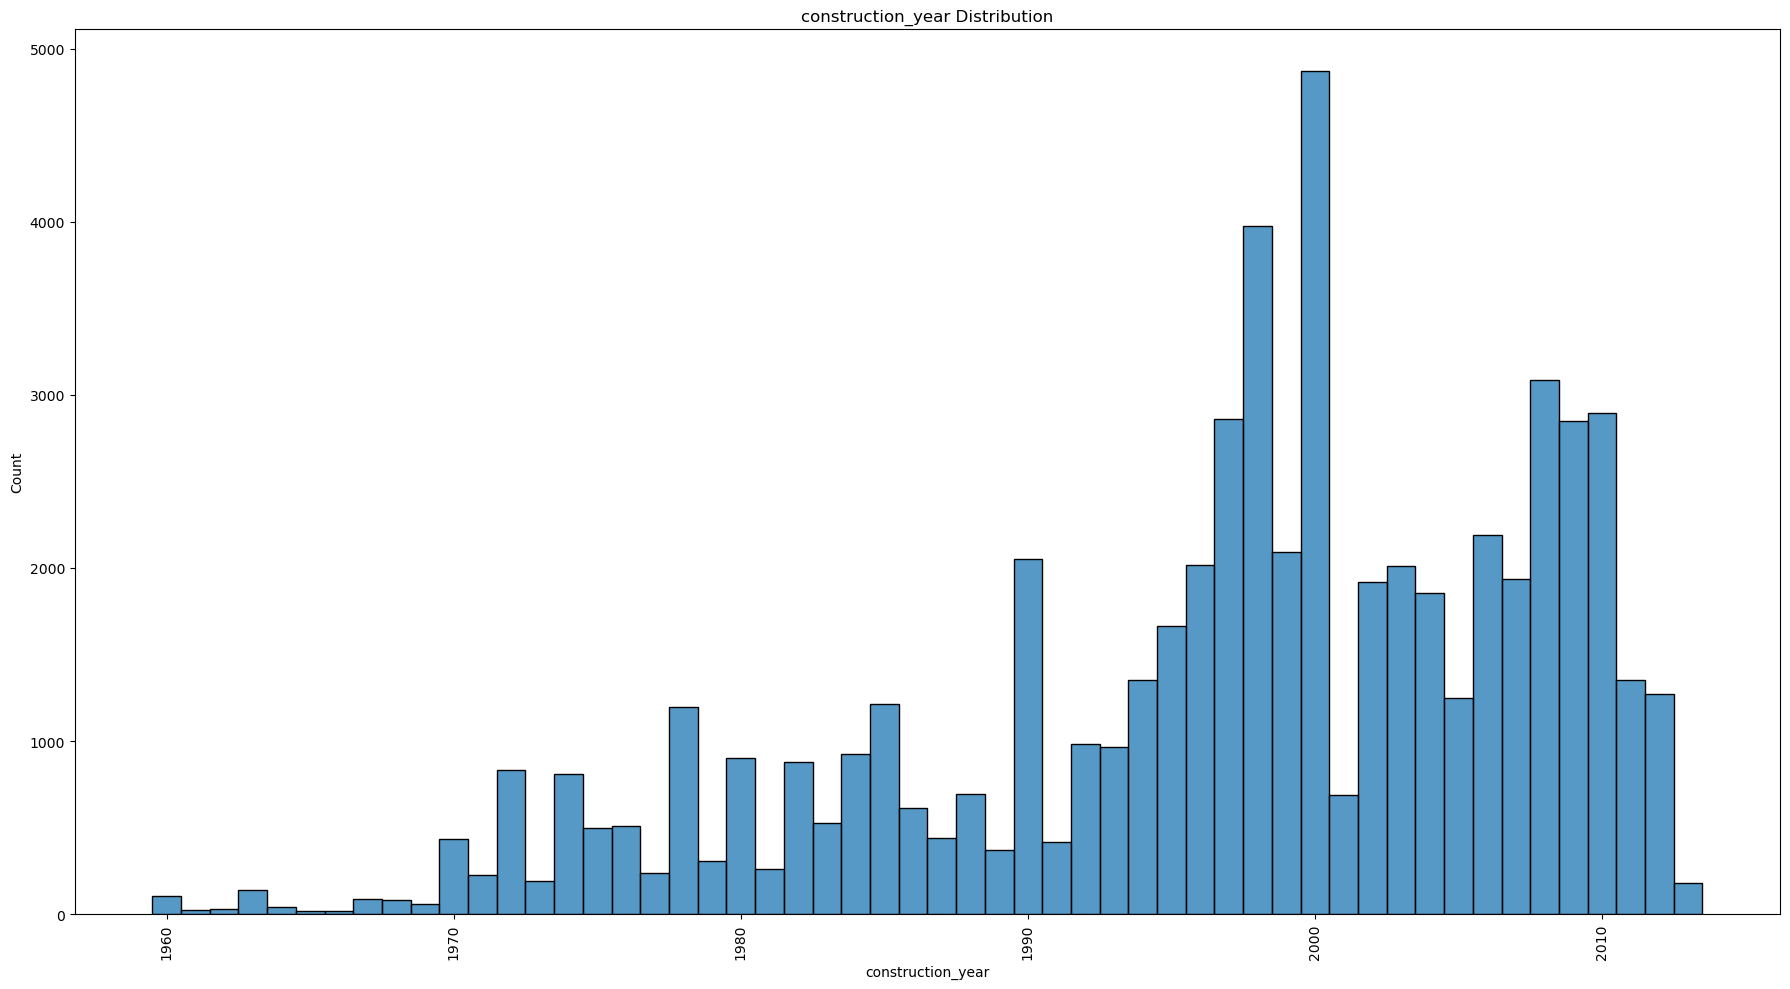

In [41]:
plt.figure(figsize=(18, 10))
sns.histplot(data=df_clean, x='construction_year', discrete=True)


plt.title("construction_year Distribution")
plt.xlabel("construction_year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("construction_year.png", dpi=300)  
plt.show()

<Figure size 1800x1000 with 0 Axes>

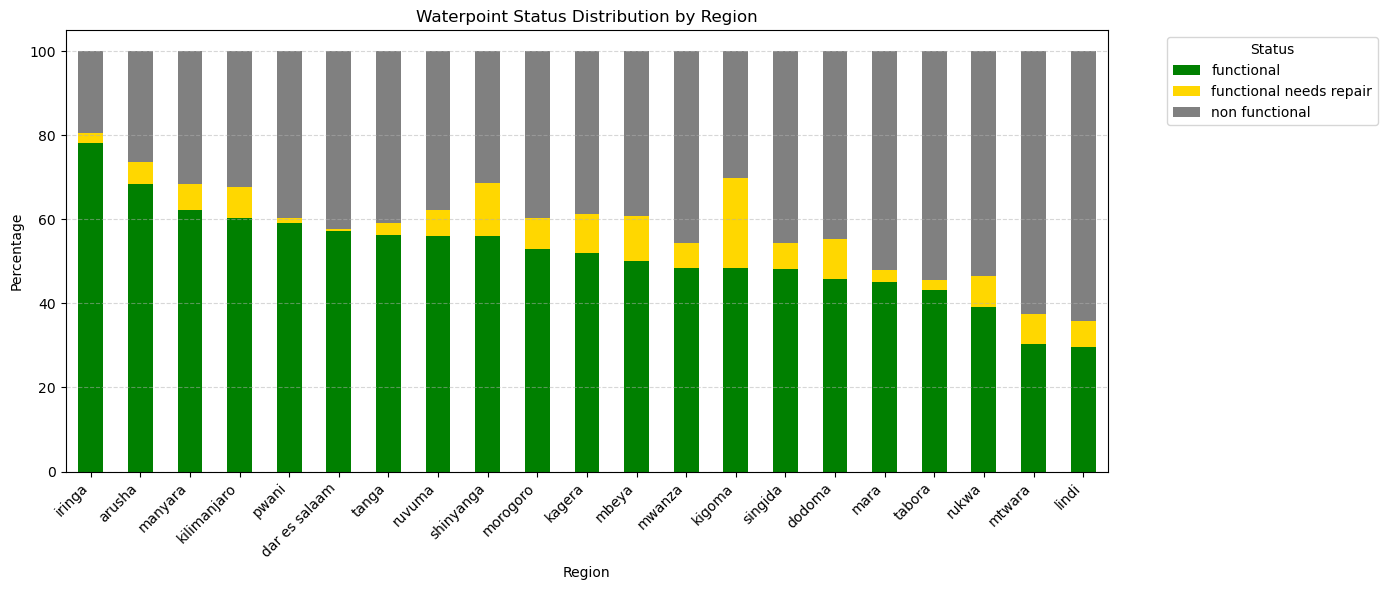

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by region and status
status_counts = df.groupby(['region', 'status_group']).size().unstack(fill_value=0)

# Convert counts to percentages
status_percent = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Sort by functional percentage (optional)
status_percent = status_percent.sort_values(by='functional', ascending=False)

# Define color mapping (order must match column order)
status_order = ['functional', 'functional needs repair', 'non functional']
colors = ['green', 'gold', 'gray']  # Green, Yellow, Gray

# Plot
plt.figure(figsize=(18, 10))
status_percent[status_order].plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(14, 6)
)

plt.title("Waterpoint Status Distribution by Region")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("status_regionwise.png", dpi=300)  

plt.show()


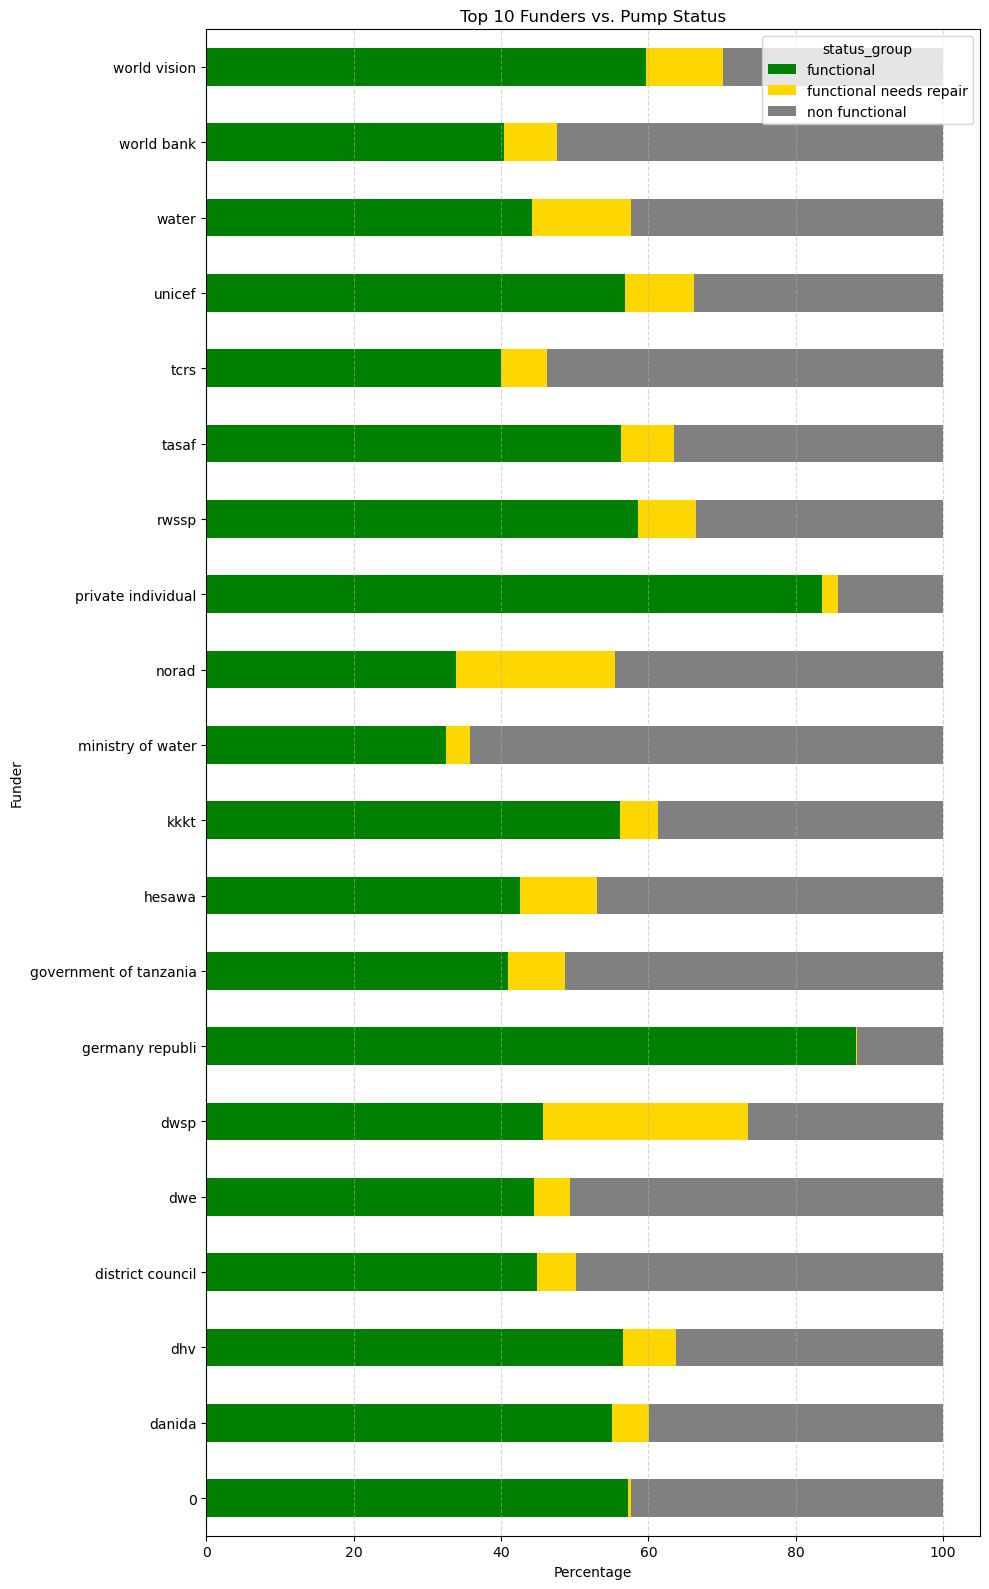

In [60]:
top_funders = df['funder'].value_counts().head(20).index
df_top = df[df['funder'].isin(top_funders)]

funder_status = df_top.groupby(['funder', 'status_group']).size().unstack(fill_value=0)
funder_percent = funder_status.div(funder_status.sum(axis=1), axis=0) * 100

# Plot
funder_percent[['functional', 'functional needs repair', 'non functional']].plot(
    kind='barh',
    stacked=True,
    color=['green', 'gold', 'gray'],
    figsize=(10, 16)
)

plt.title("Top 10 Funders vs. Pump Status")
plt.xlabel("Percentage")
plt.ylabel("Funder")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


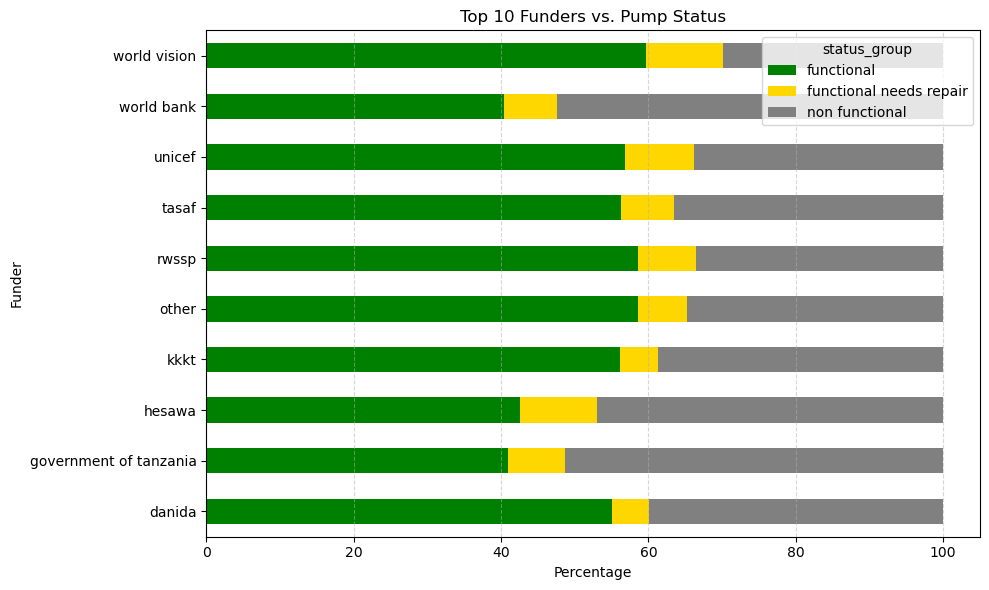

In [27]:
top_funders = df_clean['funder'].value_counts().head(10).index
df_top = df_clean[df_clean['funder'].isin(top_funders)]

funder_status = df_top.groupby(['funder', 'status_group']).size().unstack(fill_value=0)
funder_percent = funder_status.div(funder_status.sum(axis=1), axis=0) * 100

# Plot
funder_percent[['functional', 'functional needs repair', 'non functional']].plot(
    kind='barh',
    stacked=True,
    color=['green', 'gold', 'gray'],
    figsize=(10, 6)
)

plt.title("Top 10 Funders vs. Pump Status")
plt.xlabel("Percentage")
plt.ylabel("Funder")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


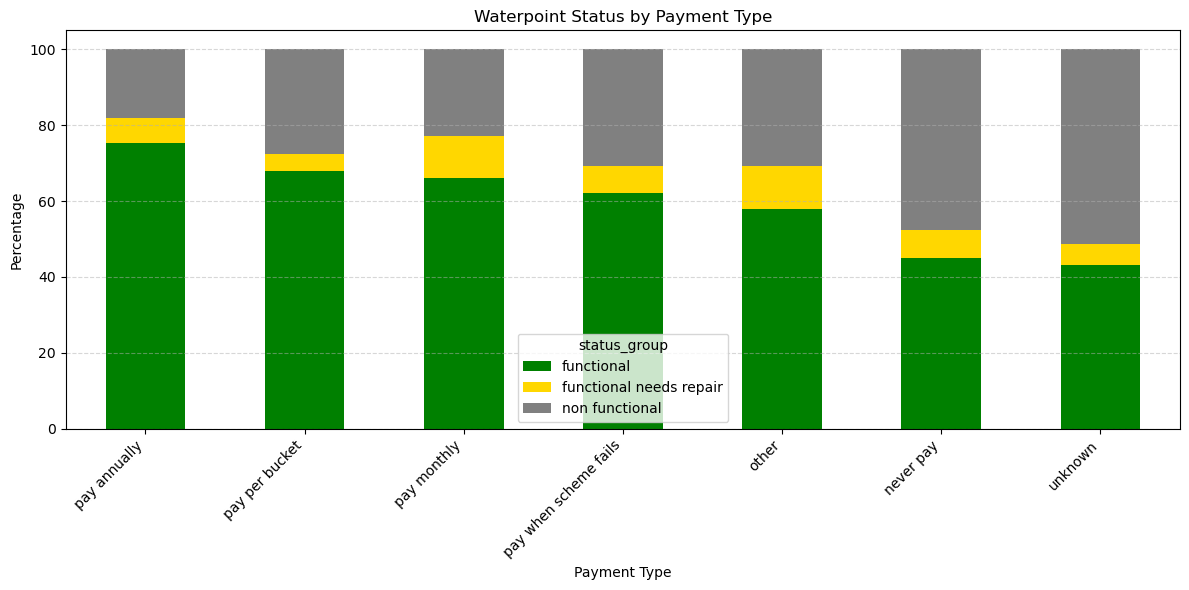

In [28]:
payment_status = df.groupby(['payment', 'status_group']).size().unstack(fill_value=0)
payment_percent = payment_status.div(payment_status.sum(axis=1), axis=0) * 100
payment_percent = payment_percent.sort_values(by='functional', ascending=False)

payment_percent[['functional', 'functional needs repair', 'non functional']].plot(
    kind='bar',
    stacked=True,
    color=['green', 'gold', 'gray'],
    figsize=(12, 6)
)

plt.title("Waterpoint Status by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


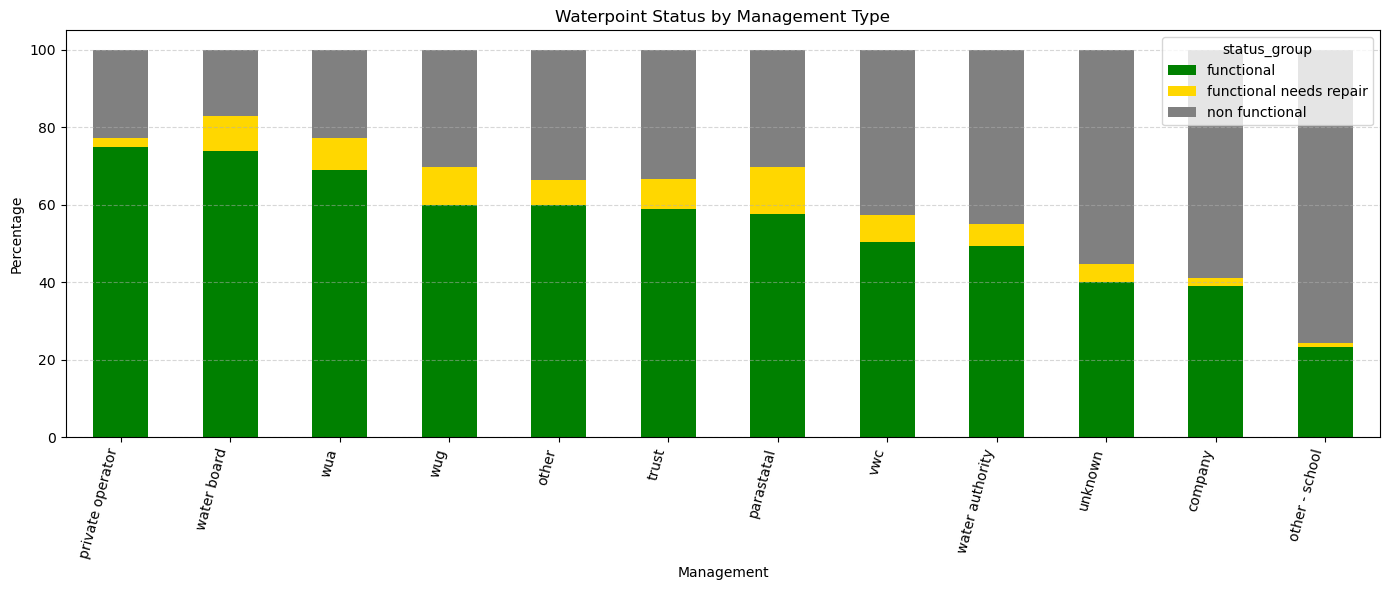

In [29]:
management_status = df.groupby(['management', 'status_group']).size().unstack(fill_value=0)
management_percent = management_status.div(management_status.sum(axis=1), axis=0) * 100
management_percent = management_percent.sort_values(by='functional', ascending=False)

management_percent[['functional', 'functional needs repair', 'non functional']].plot(
    kind='bar',
    stacked=True,
    color=['green', 'gold', 'gray'],
    figsize=(14, 6)
)

plt.title("Waterpoint Status by Management Type")
plt.xlabel("Management")
plt.ylabel("Percentage")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


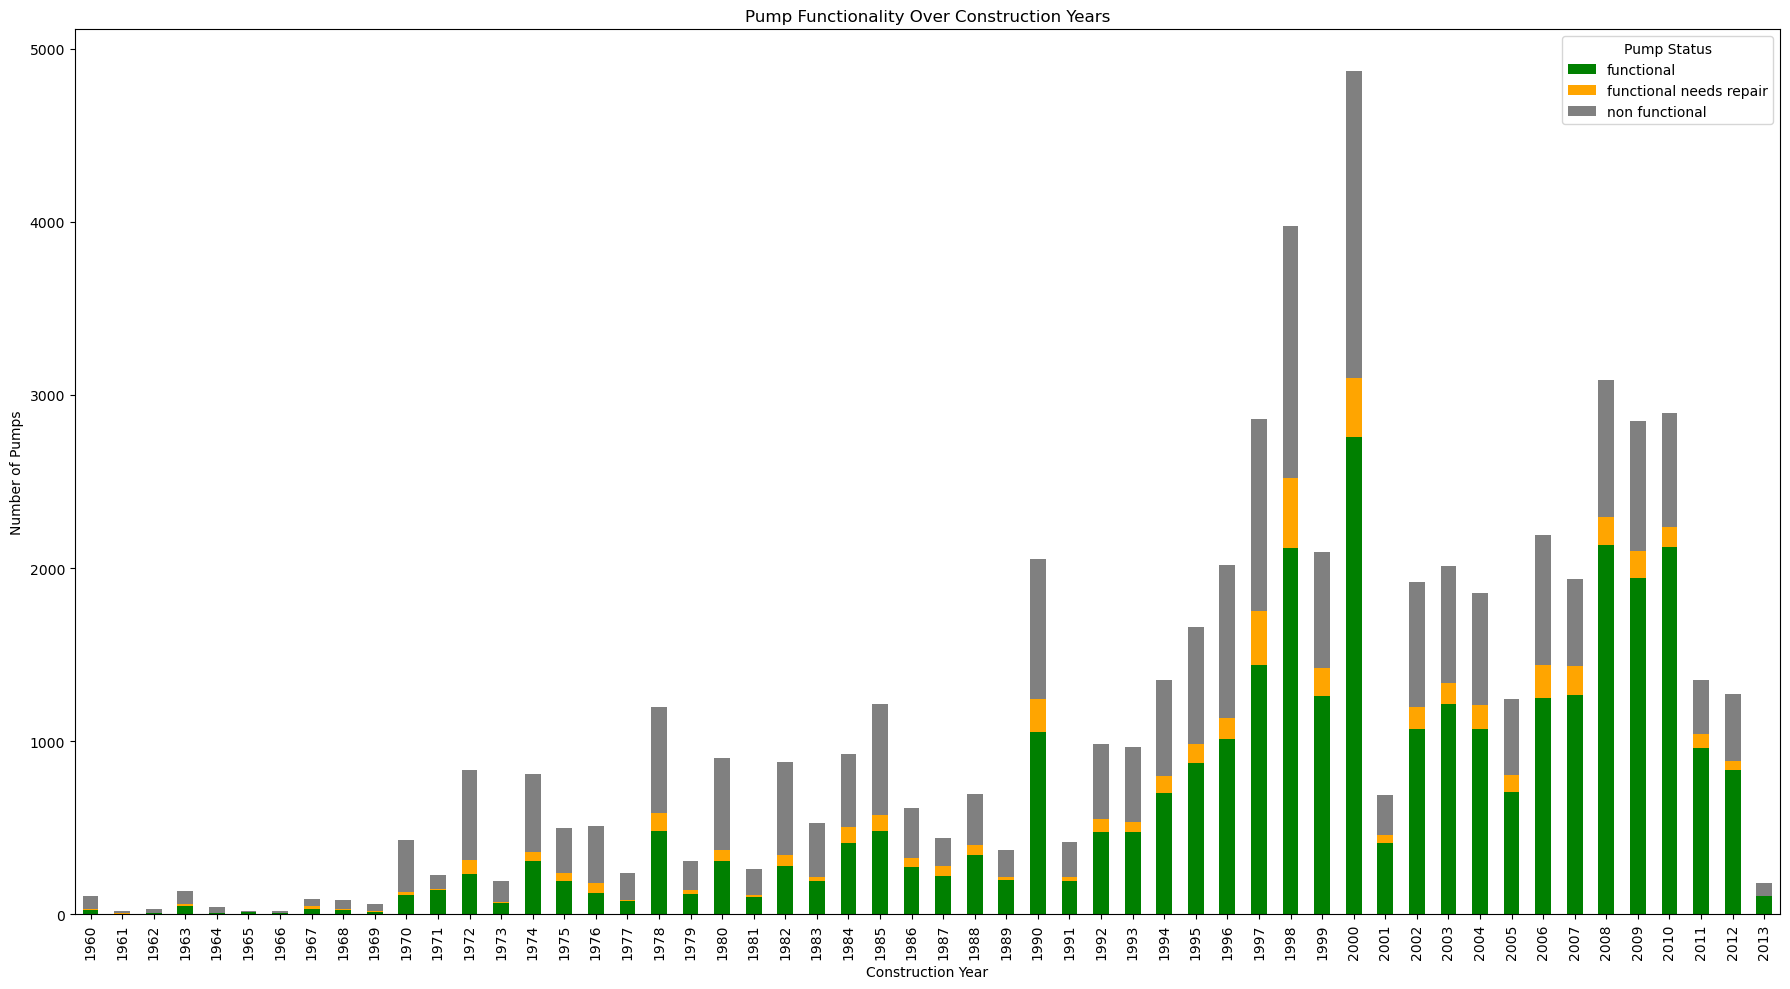

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group and count status_group per construction_year
status_by_year = df_clean.groupby(['construction_year', 'status_group']).size().unstack(fill_value=0)

# Optional: sort the years to make sure plot is in order
status_by_year = status_by_year.sort_index()

# Plot as stacked bar chart
status_by_year.plot(kind='bar', stacked=True, figsize=(18, 10),
                    color={
                        'functional': 'green',
                        'functional needs repair': 'orange',
                        'non functional': 'gray'
                    })

plt.title("Pump Functionality Over Construction Years")
plt.xlabel("Construction Year")
plt.ylabel("Number of Pumps")
plt.legend(title="Pump Status")
plt.tight_layout()

plt.savefig("year_functionality.png", dpi=300)  

plt.show()


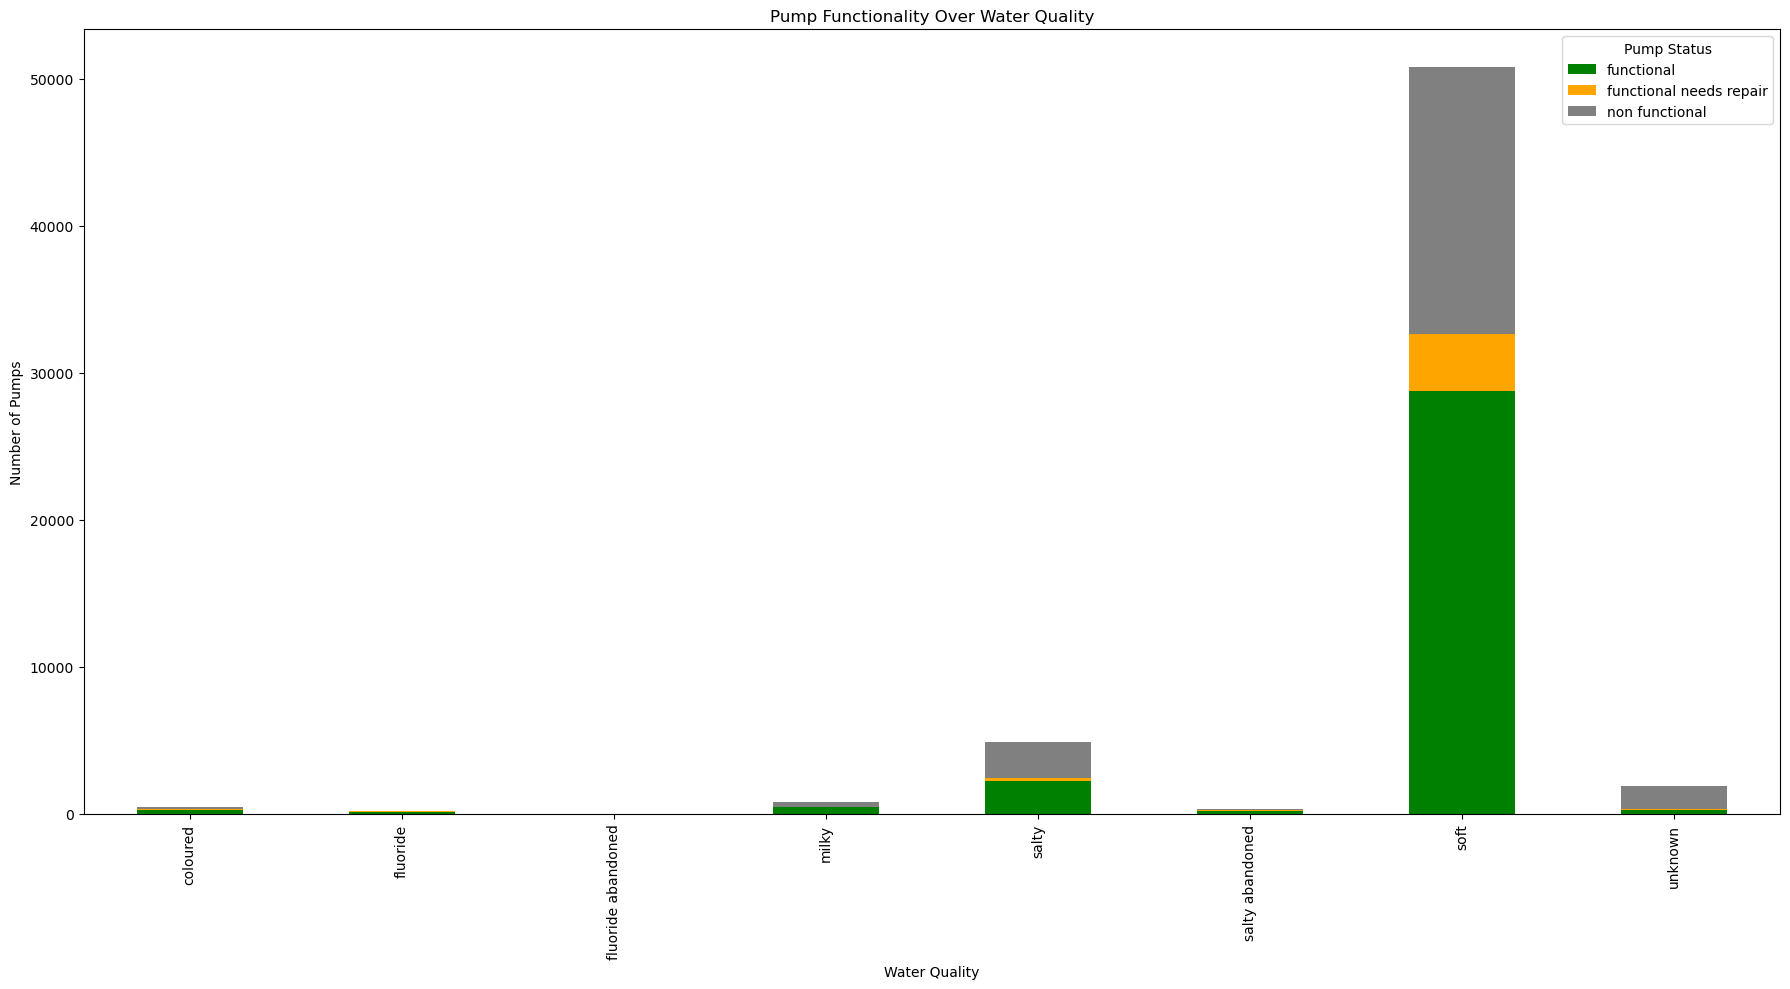

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group and count status_group per construction_year
status_by_year = df_clean.groupby(['water_quality', 'status_group']).size().unstack(fill_value=0)

# Optional: sort the years to make sure plot is in order
status_by_year = status_by_year.sort_index()

# Plot as stacked bar chart
status_by_year.plot(kind='bar', stacked=True, figsize=(18, 10),
                    color={
                        'functional': 'green',
                        'functional needs repair': 'orange',
                        'non functional': 'gray'
                    })

plt.title("Pump Functionality Over Water Quality")
plt.xlabel("Water Quality")
plt.ylabel("Number of Pumps")
plt.legend(title="Pump Status")
plt.tight_layout()

plt.savefig("WatQual_functionality.png", dpi=300)  

plt.show()


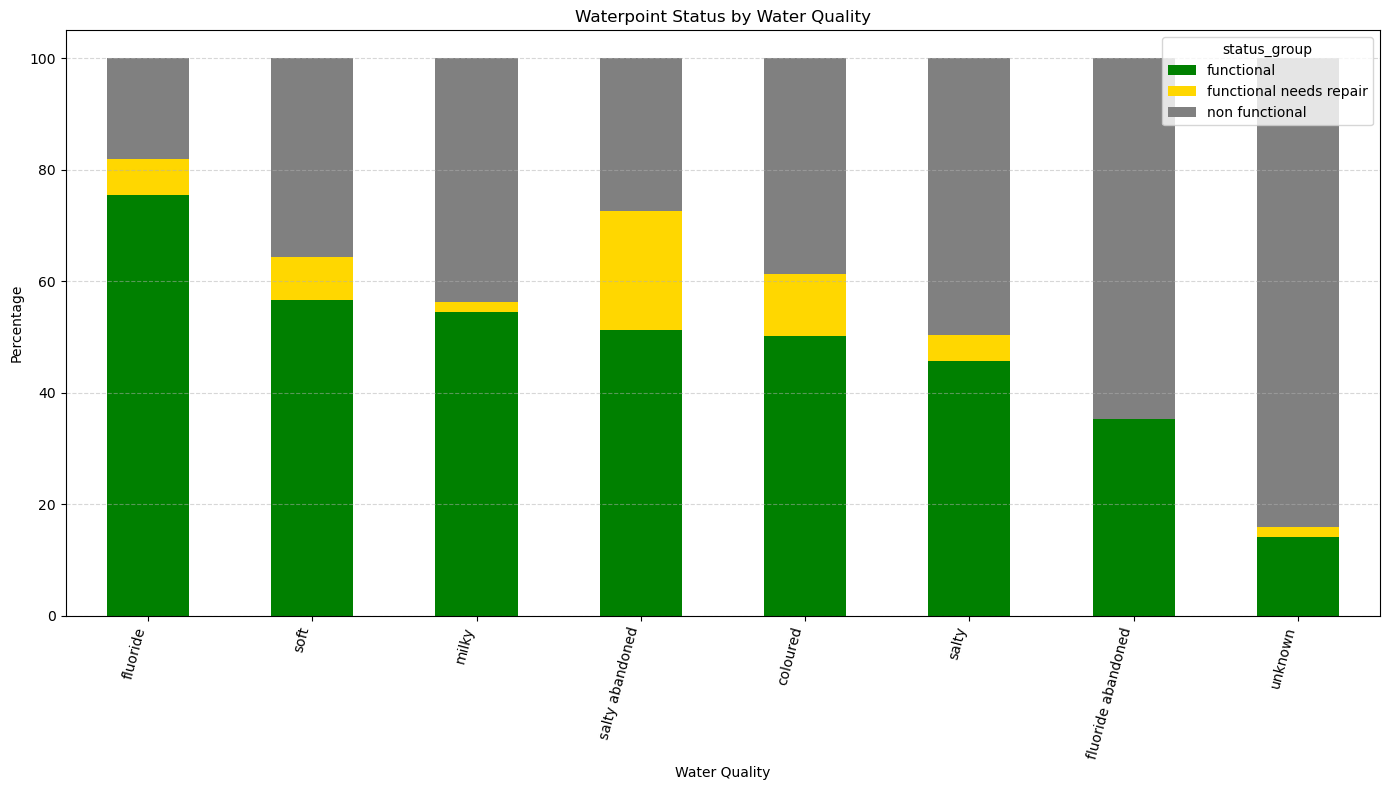

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

management_status = df.groupby(['water_quality', 'status_group']).size().unstack(fill_value=0)
management_percent = management_status.div(management_status.sum(axis=1), axis=0) * 100
management_percent = management_percent.sort_values(by='functional', ascending=False)

management_percent[['functional', 'functional needs repair', 'non functional']].plot(
    kind='bar',
    stacked=True,
    color=['green', 'gold', 'gray'],
    figsize=(14, 8)
)

plt.title("Waterpoint Status by Water Quality")
plt.xlabel("Water Quality")
plt.ylabel("Percentage")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("WatQual_functionality_filt.png", dpi=300)
plt.show()


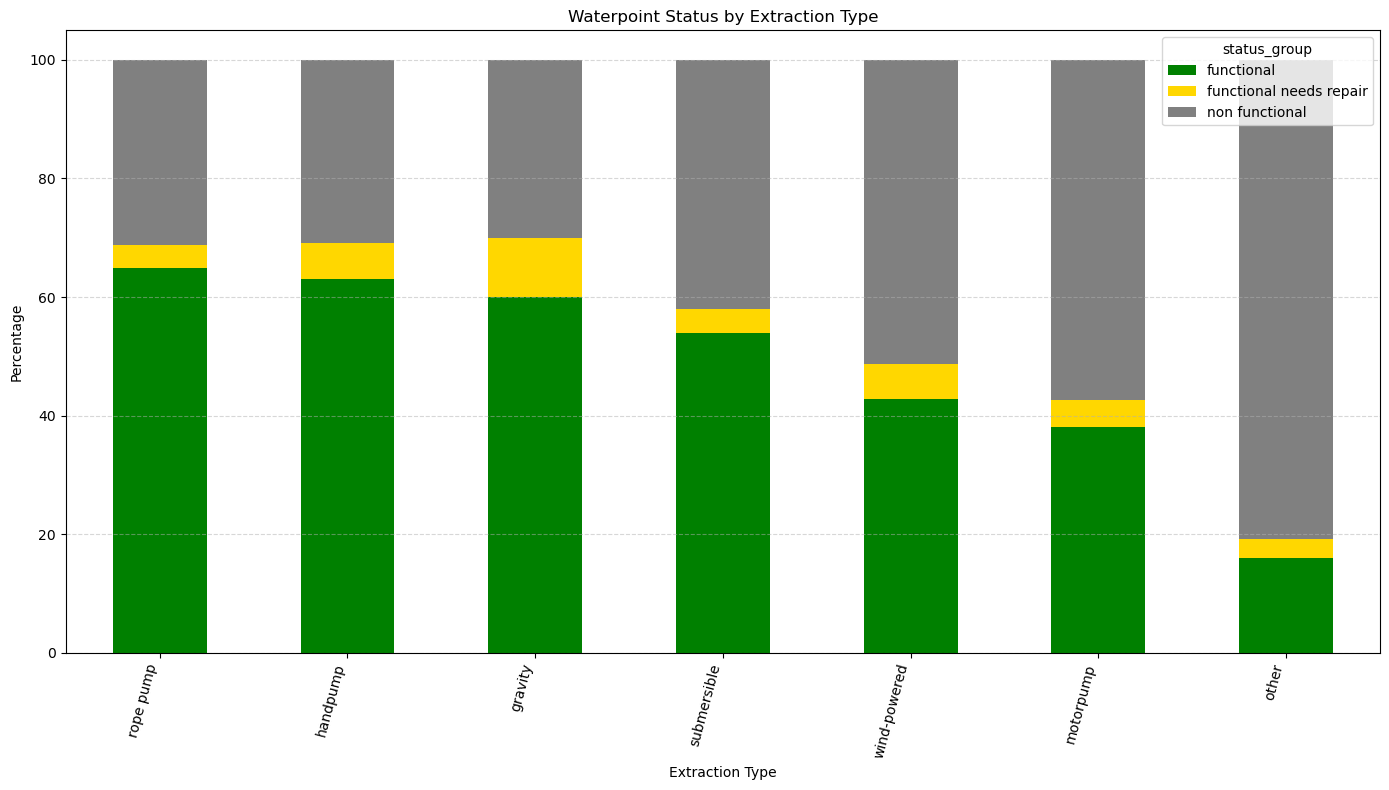

In [68]:
management_status = df.groupby(['extraction_type_class', 'status_group']).size().unstack(fill_value=0)
management_percent = management_status.div(management_status.sum(axis=1), axis=0) * 100
management_percent = management_percent.sort_values(by='functional', ascending=False)

management_percent[['functional', 'functional needs repair', 'non functional']].plot(
    kind='bar',
    stacked=True,
    color=['green', 'gold', 'gray'],
    figsize=(14, 8)
)

plt.title("Waterpoint Status by Extraction Type")
plt.xlabel("Extraction Type")
plt.ylabel("Percentage")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("ExtractionType_functionality.png", dpi=300)  

plt.show()


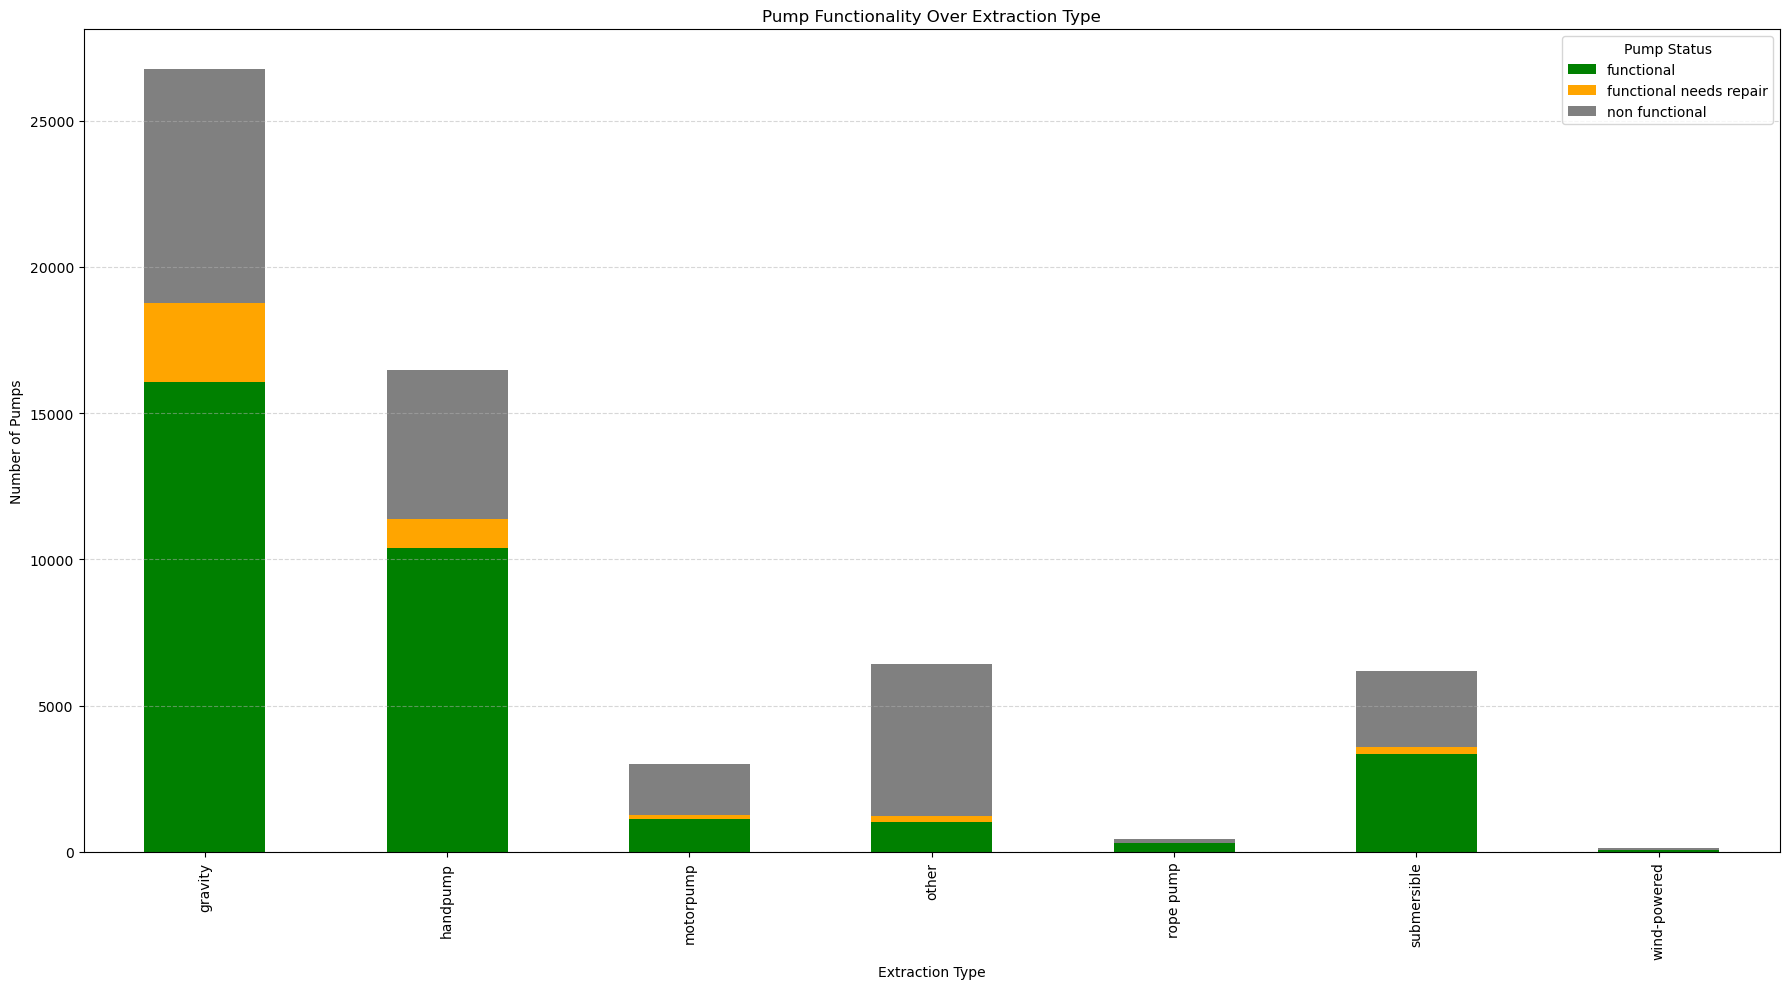

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group and count status_group per construction_year
status_by_year = df_clean.groupby(['extraction_type_class', 'status_group']).size().unstack(fill_value=0)

# Optional: sort the years to make sure plot is in order
status_by_year = status_by_year.sort_index()

# Plot as stacked bar chart
status_by_year.plot(kind='bar', stacked=True, figsize=(18, 10),
                    color={
                        'functional': 'green',
                        'functional needs repair': 'orange',
                        'non functional': 'gray'
                    })

plt.title("Pump Functionality Over Extraction Type")
plt.xlabel("Extraction Type")
plt.ylabel("Number of Pumps")
plt.legend(title="Pump Status")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
